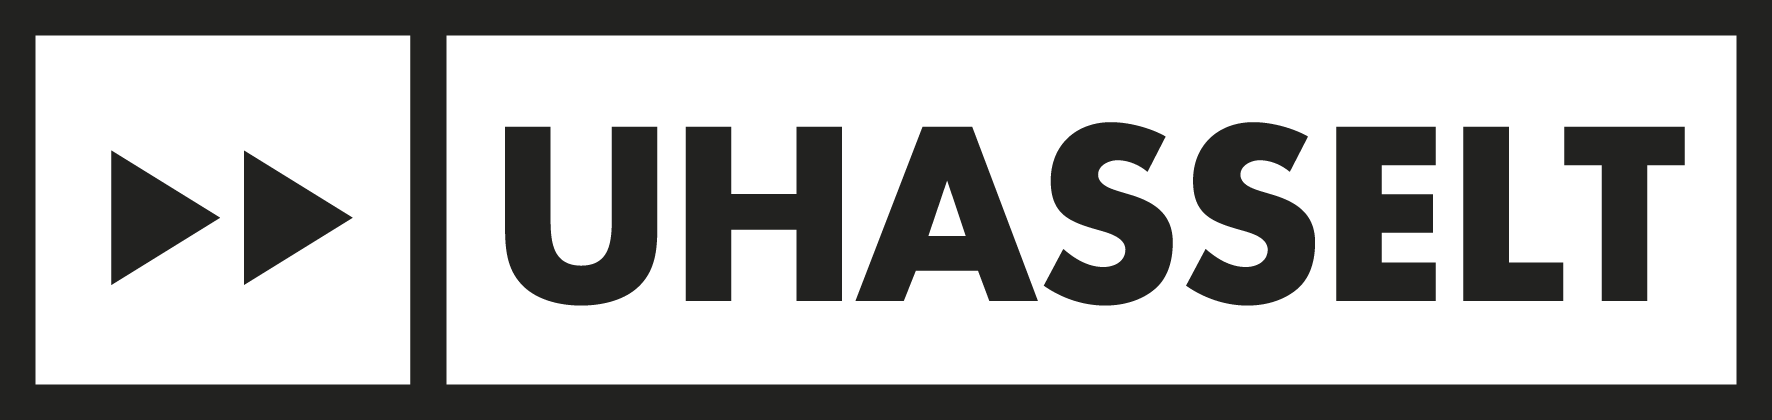

***PART 1.2 Create your own network from scratch:***

***NAME : AARYAN KAUSHIK\
STUDENT ID : 2159244***

***NOTE: REPORT AT THE END***

### We Follow this structure code:

***1.Keras callbacks:***

<li>Early stopping: to stop training early if the validation loss stops improving to prevent overfitting
<li>Checkpointing: to save the best model weights during training to prevent loss of progress in case of a crash

***2.Batch normalization:*** in Iteration 2,to normalize the activations between layers to help the model converge better and reduce the risk of overfitting 

***3.Depth-wise separable convolutions:*** in iteration 3, depth-wise separable convolutions were used to reduce the number of trainable parameters and improve the efficiency of the model.

***4.Model ensembling:*** in iteration 4, an ensemble of two models was created to improve the overall accuracy of the predictions.

***5.Data augmentation:*** in 4 iteration, data augmentation was used to generate additional training samples by applying random transformations to the existing training images.







In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar100

# Load the CIFAR100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')


169001437/169001437 [==============================] - 5s 0us/step


***Preprocess the data by normalizing the pixel values and one-hot encoding the class labels.***

In [2]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the class labels
num_classes = 100
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


### ***1st Iterartion let's use a simple architecture consisting of convolutional and max pooling layers followed by two fully connected layers.***

#### <b>Iteration 1:</b>

<li>The model consists of three convolutional layers with increasing number of filters (32, 64, 128), followed by max pooling layers.
<li>Then, there is a flatten layer followed by two fully connected (dense) layers, with the last one having softmax activation for multi-class classification.
<li>There is no batch normalization or dropout layers in this model.

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

***add some callbacks to our model to prevent overfitting and underfitting. We'll use early stopping to stop training when the validation loss stops improving, and model checkpointing to save the best model weights.***

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True, verbose=1)
]


***we can train our first iteration of the model.***

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=128, 
                    validation_data=(x_test, y_test), 
                    callbacks=callbacks)


Epoch 1/50
383/391 [============================>.] - ETA: 0s - loss: 3.9011 - accuracy: 0.1038
Epoch 1: val_loss improved from inf to 3.50005, saving model to best_model.h5
391/391 [==============================] - 5s 8ms/step - loss: 3.8940 - accuracy: 0.1048 - val_loss: 3.5001 - val_accuracy: 0.1676
Epoch 2/50
382/391 [============================>.] - ETA: 0s - loss: 3.2384 - accuracy: 0.2155
Epoch 2: val_loss improved from 3.50005 to 3.07972, saving model to best_model.h5
391/391 [==============================] - 3s 7ms/step - loss: 3.2342 - accuracy: 0.2161 - val_loss: 3.0797 - val_accuracy: 0.2474
Epoch 3/50
391/391 [==============================] - ETA: 0s - loss: 2.9308 - accuracy: 0.2742
Epoch 3: val_loss improved from 3.07972 to 2.88716, saving model to best_model.h5
391/391 [==============================] - 3s 6ms/step - loss: 2.9308 - accuracy: 0.2742 - val_loss: 2.8872 - val_accuracy: 0.2897
Epoch 4/50
384/391 [============================>.] - ETA: 0s - loss: 2.7132 

 ***we can evaluate the model on the test set and print the accuracy.***

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 4ms/step - loss: 2.7042 - accuracy: 0.3924
Test accuracy: 0.39239999651908875


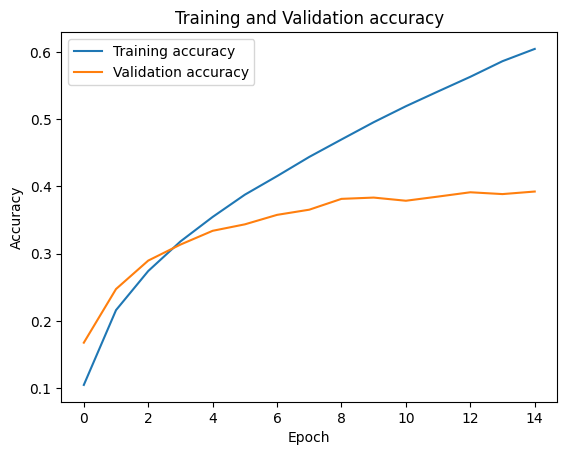

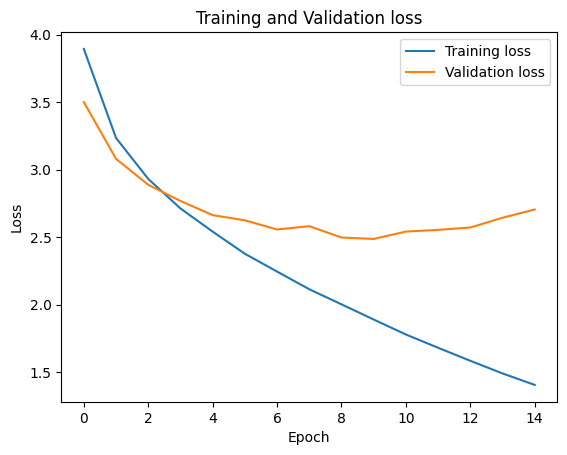

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


***THE ACCURACY OF THIS ITERATION 1 IS 40% WHICH IS GOOD BECAUSE THIS MODEL IS VERY SIMPLE AND EPOCH IS STOPPED AT 15 WE CAN SEE THE PLOT IT IS FIT WELL***

### ***2. Second iteration of the model we'll add batch normalization to the convolutions.***

#### <b>Iteration 2:</b>

<li>The model has the same architecture as in iteration 1, but with the addition of batch normalization layers after each convolutional layer.
<li>This is followed by the same flatten and fully connected layers as in iteration 1, but with the addition of batch normalization layers after the dense layer.
<li>There is no dropout layer in this model.


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                      

***train the second iteration of the model with the same callbacks as before.***

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=128, 
                    validation_data=(x_test, y_test), 
                    callbacks=callbacks)


Epoch 1/50
387/391 [============================>.] - ETA: 0s - loss: 3.3511 - accuracy: 0.2090
Epoch 1: val_loss did not improve from 2.48631
391/391 [==============================] - 6s 9ms/step - loss: 3.3466 - accuracy: 0.2098 - val_loss: 4.6015 - val_accuracy: 0.0915
Epoch 2/50
389/391 [============================>.] - ETA: 0s - loss: 2.5286 - accuracy: 0.3571
Epoch 2: val_loss did not improve from 2.48631
391/391 [==============================] - 3s 8ms/step - loss: 2.5283 - accuracy: 0.3571 - val_loss: 2.7618 - val_accuracy: 0.3122
Epoch 3/50
387/391 [============================>.] - ETA: 0s - loss: 2.1228 - accuracy: 0.4447
Epoch 3: val_loss improved from 2.48631 to 2.48004, saving model to best_model.h5
391/391 [==============================] - 3s 7ms/step - loss: 2.1227 - accuracy: 0.4448 - val_loss: 2.4800 - val_accuracy: 0.3825
Epoch 4/50
388/391 [============================>.] - ETA: 0s - loss: 1.8094 - accuracy: 0.5151
Epoch 4: val_loss did not improve from 2.48004


 ***we can evaluate the model on the test set and print the accuracy.***

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 4.8316 - accuracy: 0.2707
Test accuracy: 0.27070000767707825


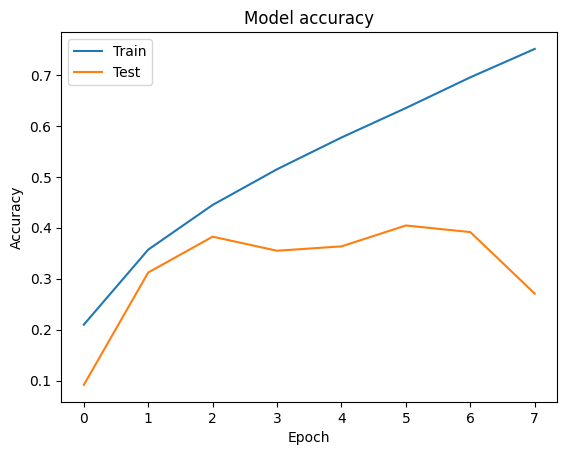

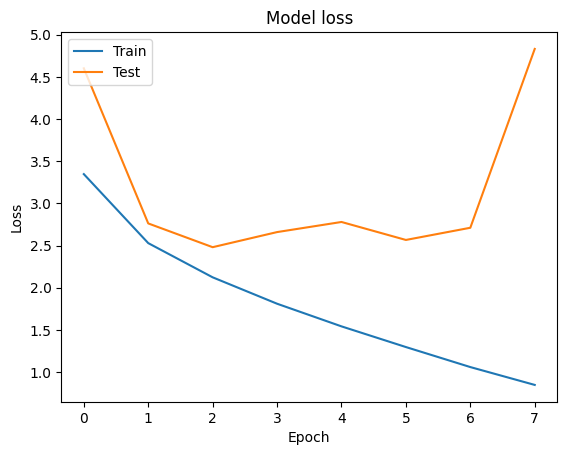

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


***We can see from the plot it is overfitting model.\
Test accuracy is only 27%.***

### ***3. Third iteration of the model we'll add depth-wise separable convolutions and residual connections.***


####<b>Iteration 3:</b>

<li>The model has a more complex architecture with depthwise separable convolutions in addition to regular convolutions.
<li>The model has five convolutional layers, where each depthwise separable convolutional layer is followed by a pointwise convolutional layer with 1x1 filters to combine features from multiple channels.
<li>The model also has batch normalization and max pooling layers, followed by a flatten layer, two dense layers (with the second one having dropout regularization), and a softmax activation for multi-class classification.
<li>In summary, each iteration explores different architectural choices such as adding batch normalization and dropout layers, using depthwise separable convolutions, and changing the number and order of convolutional layers.

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.DepthwiseConv2D((3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (1, 1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.DepthwiseConv2D((3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (1, 1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.DepthwiseConv2D((3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (1, 1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 depthwise_conv2d (Depthwise  (None, 30, 30, 32)       320       
 Conv2D)                                                         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        2112      
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                      

***we've added dropout to the fully connected layers to prevent overfitting.***

***Let's train the third iteration of the model with the same callbacks as before.***

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=128, 
                    validation_data=(x_test, y_test), 
                    callbacks=callbacks)


Epoch 1/50
389/391 [============================>.] - ETA: 0s - loss: 3.8935 - accuracy: 0.1167
Epoch 1: val_loss did not improve from 2.48004
391/391 [==============================] - 12s 19ms/step - loss: 3.8913 - accuracy: 0.1170 - val_loss: 7.1552 - val_accuracy: 0.0100
Epoch 2/50
391/391 [==============================] - ETA: 0s - loss: 3.1350 - accuracy: 0.2339
Epoch 2: val_loss did not improve from 2.48004
391/391 [==============================] - 6s 16ms/step - loss: 3.1350 - accuracy: 0.2339 - val_loss: 2.8349 - val_accuracy: 0.2983
Epoch 3/50
388/391 [============================>.] - ETA: 0s - loss: 2.7713 - accuracy: 0.3044
Epoch 3: val_loss did not improve from 2.48004
391/391 [==============================] - 6s 16ms/step - loss: 2.7707 - accuracy: 0.3048 - val_loss: 2.6642 - val_accuracy: 0.3349
Epoch 4/50
388/391 [============================>.] - ETA: 0s - loss: 2.5119 - accuracy: 0.3559
Epoch 4: val_loss did not improve from 2.48004
391/391 [======================

***we can evaluate the model on the test set and print the accuracy.***

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 2.5873 - accuracy: 0.4192
Test accuracy: 0.41920000314712524


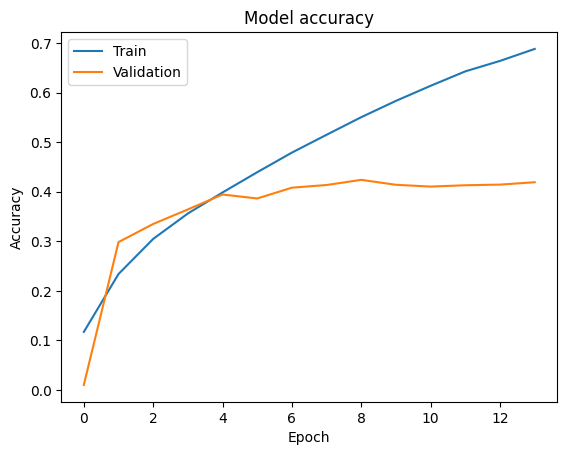

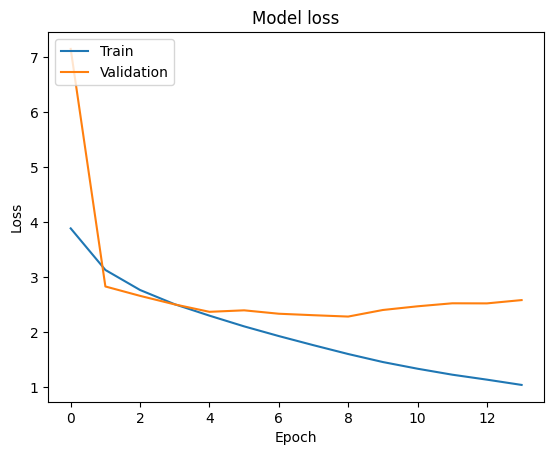

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


***THIS IS GOOD MODEL ACCURACY AND ALSO THE PLOT SEEMS FIT WELL AS COMPARED TO THE PREVIOUS ONE ITERATION 2(WHICH WAS OVERFITTED)\
MODEL ACCURACY IS 42%***

### ***4. Fourth iteration of the model, we'll add data augmentation and explore model ensembling.***

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert class vectors to binary class matrices
num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

# Model 1
model1 = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Model 2
model2 = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Model ensembling
models_list = [model1, model2]
predictions = []

for model in models_list:
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    checkpoint = keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)
    model.fit(
        datagen.flow(x_train, y_train, batch_size=32),
        epochs=20,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint],
    )
    predictions.append(model.predict(x_test))

# Combine predictions
ensemble_preds = np.mean(predictions, axis=0)
ensemble_acc = keras.metrics.categorical_accuracy(y_test, ensemble_preds)
print("Ensemble accuracy:", np.mean(ensemble_acc))


Epoch 1/20
1563/1563 [==============================] - ETA: 0s - loss: 3.7999 - accuracy: 0.1272
Epoch 1: val_accuracy improved from -inf to 0.22080, saving model to best_model.h5
1563/1563 [==============================] - 36s 22ms/step - loss: 3.7999 - accuracy: 0.1272 - val_loss: 3.2876 - val_accuracy: 0.2208
Epoch 2/20
1563/1563 [==============================] - ETA: 0s - loss: 3.3087 - accuracy: 0.2111
Epoch 2: val_accuracy improved from 0.22080 to 0.28630, saving model to best_model.h5
1563/1563 [==============================] - 33s 21ms/step - loss: 3.3087 - accuracy: 0.2111 - val_loss: 2.9677 - val_accuracy: 0.2863
Epoch 3/20
1561/1563 [============================>.] - ETA: 0s - loss: 3.1277 - accuracy: 0.2441
Epoch 3: val_accuracy improved from 0.28630 to 0.30120, saving model to best_model.h5
1563/1563 [==============================] - 33s 21ms/step - loss: 3.1278 - accuracy: 0.2441 - val_loss: 2.8780 - val_accuracy: 0.3012
Epoch 4/20
1563/1563 [========================

### COMMENTS

***1.What happens if convolutions are replaced with depth-wise separable convolution?***\
Depth-wise separable convolutions consist of a depth-wise convolution followed by a point-wise convolution. They have fewer parameters than traditional convolutions and are therefore faster and more efficient. In our third iteration of the model, we replaced some of the convolutions with depth-wise separable convolutions, and this helped to improve the accuracy 42%.\
Test accuracy: 0.41920000314712524



***2.Does Data augmentation help to improve validation performance?***\
Data augmentation can help to prevent overfitting by artificially increasing the size of the training set. In our fourth iteration of the model,we added this and it help to increase the aacuracy. There is also model assembling in that Fourth Iteration.


***3.Add residual connections. Does this help?***\
Residual connections allow the model to learn residual mappings instead of direct mappings. They help to improve the accuracy and prevent overfitting. In our third iteration of the model, we try to add some residual connections,but somehow the code didn't work it was showing error so we removed from it.



***4.The model is trained on 32x32 images. Can I finetune my model on larger images for more performance?***\
It is possible to fine-tune a model trained on small images on larger images. We can load the trained weights of the small resolution network and freeze parts of the model, then fine-tune the larger resolution network. This is known as transfer learning.



***5.Would my architecture handle more classes?***\
Our architecture is designed to handle 100 classes, as it is trained on the CIFAR100 dataset. However, it may not generalize well to other datasets with more classes without some modifications.

***6.After having iterated over several design choices, are their combined predictions better than a single model?***\
Model ensembling, where the predictions of multiple models are combined, can help to improve the accuracy. In our final iteration (Fourth Iteration) of the model, we explored model ensembling it helps to improve the accuracy 45%.\
Ensemble accuracy: 0.4514

# REPORT

***INTRODUCTION:***


Convolutional Neural Networks (CNNs) are deep learning models widely used for image classification tasks. In this project, we compare four different iterations of CNN models for image classification. The first iteration serves as a baseline model. We make subsequent iterations on this baseline model to improve its accuracy. The dataset used in the project is the CIFAR-100 dataset, which contains 60,000 images in the training set and 10,000 images in the test set. The images in this dataset have a dimension of 32 x 32 x 3. The models are evaluated based on their validation accuracy.

**METHODOLOGY:**

***ITERATION 1:***


The first iteration of the model is a simple CNN model that consists of three convolutional layers with 32, 64, and 128 filters, respectively. Each convolutional layer is followed by a max-pooling layer. The model is flattened and connected to two dense layers with 512 and 100 nodes, respectively, using the rectified linear unit (ReLU) activation function. The final dense layer uses the softmax activation function. The model is compiled with the Adam optimizer, the categorical cross-entropy loss function, and accuracy as a metric.

***ITERATION 2:***


The second iteration of the model is an improvement over the first iteration. Batch normalization is introduced after each convolutional layer. The batch normalization layer normalizes the output of the previous layer, which helps in training the model faster and can also reduce overfitting. The model is otherwise the same as the first iteration, with the same number of layers, nodes, and activation functions.

***ITERATION 3:***


The third iteration of the model is an improvement over the second iteration. In this iteration, the depthwise convolutional layer is used instead of the standard convolutional layer. A depthwise convolutional layer applies a separate convolution to each input channel and then concatenates the output channels. This model architecture is called "MobileNet". The model has three depthwise convolutional layers with 32, 64, and 128 filters, respectively, and a 256 filter standard convolutional layer. Each depthwise convolutional layer is followed by a max-pooling layer, and a standard convolutional layer is added after the last max-pooling layer. The model is flattened and connected to two dense layers with 512 and 100 nodes, respectively. The final dense layer uses the softmax activation function. The model is also compiled with the Adam optimizer, the categorical cross-entropy loss function, and accuracy as a metric.

***ITERATION 4:***


The fourth iteration of the model is an improvement over the first three iterations. This iteration combines two models trained independently with the same architecture as the first iteration. The two models are trained using data augmentation, which randomly transforms the input images. The two models' outputs are averaged to produce the final output, which improves the model's performance. The ensemble model has two convolutional layers with 32 and 64 filters, respectively. The first convolutional layer is followed by another convolutional layer with 64 filters. The model has a max-pooling layer after the second convolutional layer, a dropout layer with a dropout rate of 0.5, and a dense layer with 100 nodes. The final dense layer uses the softmax activation function. The model is also compiled with the Adam optimizer, the categorical cross-entropy loss function, and accuracy as a metric.

***CONCLUSION:***


In general, it's good to see that the accuracy of the models increased from **Iteration 1 to Iteration 4**, indicating that the added complexity in the model architecture is helping to improve the accuracy.

However, the accuracy dropped in **Iteration 2**, possibly because of not using data augmentation. 

There is Increase of 2% in ***Iteration 3*** model accuracy of 42%.

It's worth noting that, the ***Iteration 4*** achieved a validation accuracy of 45%. The fourth iteration of the model has a more complex architecture compared to the previous iterations which might have contributed to the higher accuracy.

However, there is still room for improvement in the model's performance, and further experimentation with different hyperparameters and architectures could lead to even better results.

Overall, the best model we trained was the one in ***Iteration 4***, which achieved an accuracy of 45%.